<a href="https://colab.research.google.com/github/gayecolakoglu/Malaria_Detection_Deep_Learning/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [ ]:
import pathlib
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

import cv2,os
data_path='/content/gdrive/MyDrive/Colab Notebooks/ML/cell_images/'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]
data_dir = pathlib.Path(data_path)

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

parasited_count = len(list(data_dir.glob('Parasitized/*.png')))
print("Parasited:",parasited_count)

uninfected_count = len(list(data_dir.glob('Uninfected/*.png')))
print("Uninfected:",uninfected_count)

{'Parasitized': 0, 'Uninfected': 1}
['Parasitized', 'Uninfected']
[0, 1]
Parasited: 13779
Uninfected: 11112


In [ ]:
img_size=224
data=[]
target=[]

for category in categories:
    print("CATEGORY:", category)
    i = 0 
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        if(i == 2000):
          break
        print("IMAGE name", img_name)
        i += 1
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:  
            resized=cv2.resize(img,(img_size,img_size))
            #resizing the image  into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

CATEGORY: Parasitized
IMAGE name C92P53ThinF_IMG_20150821_151224_cell_209.png
IMAGE name C92P53ThinF_IMG_20150821_151224_cell_210.png
IMAGE name C92P53ThinF_IMG_20150821_151224_cell_211.png
IMAGE name C92P53ThinF_IMG_20150821_151224_cell_212.png
IMAGE name C92P53ThinF_IMG_20150821_151646_cell_201.png
IMAGE name C92P53ThinF_IMG_20150821_151646_cell_202.png
IMAGE name C92P53ThinF_IMG_20150821_151646_cell_203.png
IMAGE name C92P53ThinF_IMG_20150821_151646_cell_204.png
IMAGE name C92P53ThinF_IMG_20150821_151646_cell_205.png
IMAGE name C92P53ThinF_IMG_20150821_151646_cell_206.png
IMAGE name C92P53ThinF_IMG_20150821_151646_cell_207.png
IMAGE name C92P53ThinF_IMG_20150821_151722_cell_222.png
IMAGE name C92P53ThinF_IMG_20150821_151722_cell_223.png
IMAGE name C92P53ThinF_IMG_20150821_151722_cell_224.png
IMAGE name C93P54ThinF_IMG_20150821_162641_cell_217.png
IMAGE name C93P54ThinF_IMG_20150821_162641_cell_218.png
IMAGE name C93P54ThinF_IMG_20150821_162641_cell_219.png
IMAGE name C93P54ThinF_IMG

# Recale and assign catagorical lables

In [ ]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
target=np.array(target)
from keras.utils import np_utils
new_target=np_utils.to_categorical(target)

In [ ]:
new_target.shape

(3999, 2)

In [ ]:
new_target

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

# CNN Model

In [ ]:
data.shape

(3999, 224, 224, 3)

In [ ]:
data.shape[1:]

(224, 224, 3)

In [ ]:

from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
     

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 200)     5600      
                                                                 
 activation (Activation)     (None, 222, 222, 200)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 200)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 100)     180100    
                                                                 
 activation_1 (Activation)   (None, 109, 109, 100)     0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 100)      0         
 2D)                                                    

# Splittiong data into traning and testing


In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.2)

In [ ]:
train_data.shape

(3599, 100, 100, 3)

In [ ]:
train_target.shape

(3599, 2)

In [ ]:
#checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=10,validation_split=0.2)
     

In [ ]:
model.save('model2.h5')

In [ ]:

from matplotlib import pyplot as plt

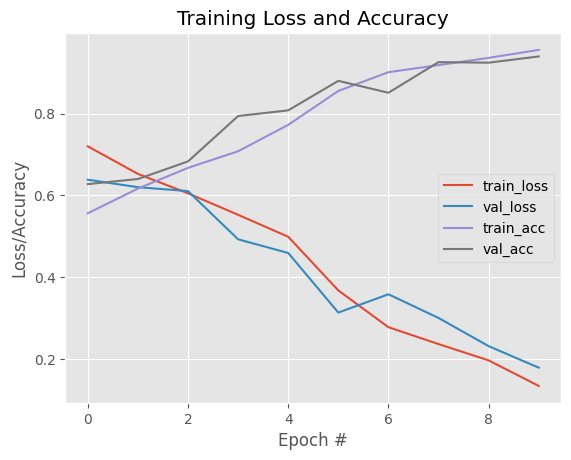

In [ ]:

# plot the training loss and accuracy
N = 10
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")